<a href="https://colab.research.google.com/github/rxlnj/SRISHTI-2023/blob/main/Assignment2_Roseline_DataFeatures%26Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roseline Jerry A PES University Group 11 SRISHTI 2023

## SRISHTI'23 Tutorial 02<br>
Module Coordinator : amit.pandey@research.iiit.ac.in <br>

### The aim of this lab is to introduce DATA and FEATURES.
We will study: Feature extraction and Data Augmentation.
Let's get started.



Make a copy before running the cells

### Data can be anything like text, image , sound signals, and even a mix of multiple types (multimodal). We need to learn how to handle raw data, and how to use them for our analysis.

# Extracting features from data


 



## What are features? 
### Features are individual independent variables that act like an input to your system. 
A very basic example is: In z = x + y, x and y are the features.
We can have simple features like above or even more complex features learned by our machine learning models (we will study these later on).

# Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



Extract a subset of the data for our experiment:

In [2]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.

Let us visualize a few images here:

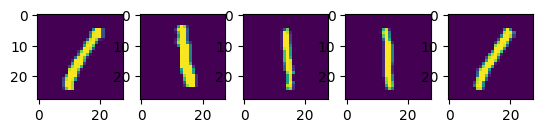

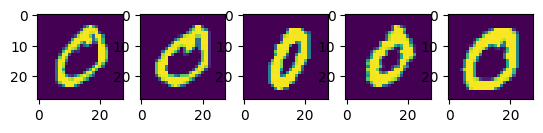

In [3]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [4]:
a = no1>0
a.shape, no1.shape

((6742, 28, 28), (6742, 28, 28))

In [5]:
## to help you understand how the np.sum is working to find count of pixels that are not zero.

mtx = np.arange(8).reshape(2,2,2)
a = mtx>1
a[0][0][0]
type(a[0][0][0])


numpy.bool_

## We can even use value of each pixel as a feature. But let us see how to derive other features.

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [6]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [7]:
sum1.shape

(6742,)

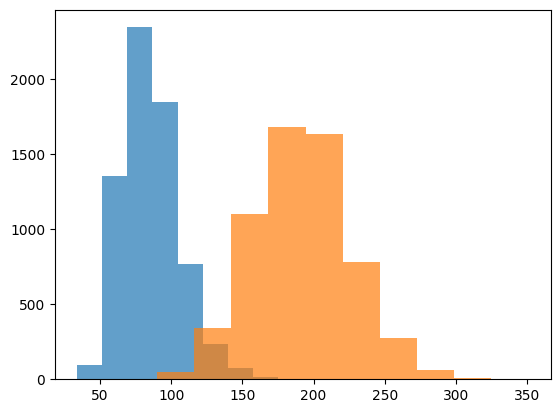

In [8]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);



We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [9]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

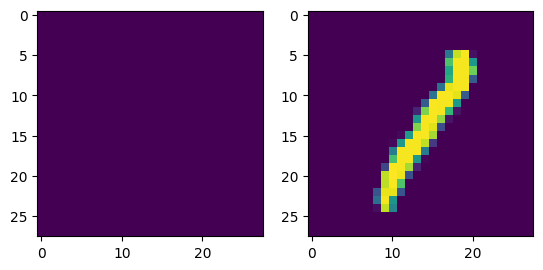

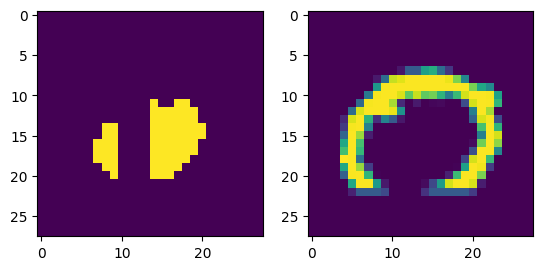

In [10]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

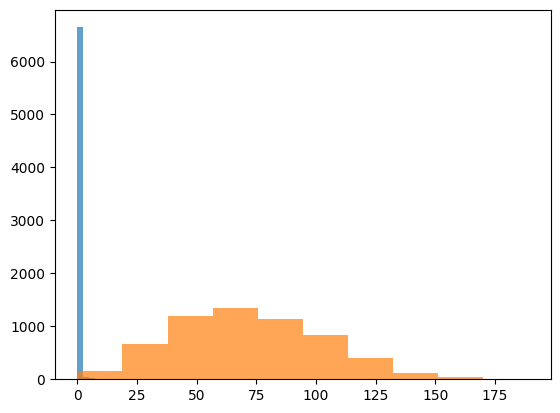

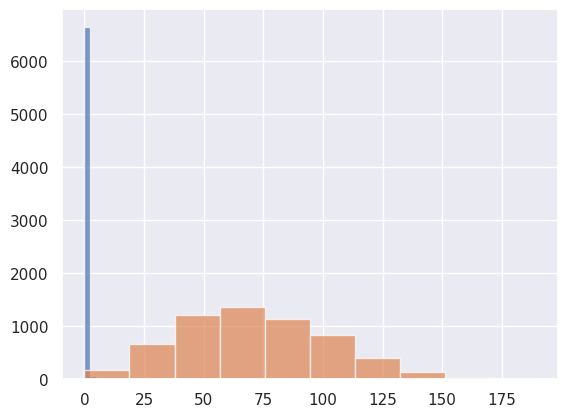

In [67]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [12]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

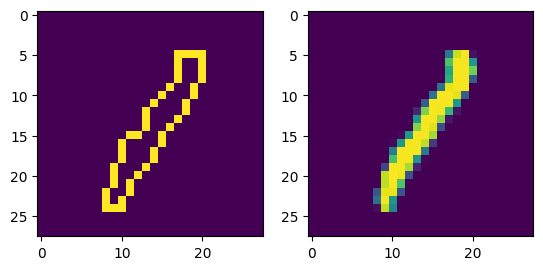

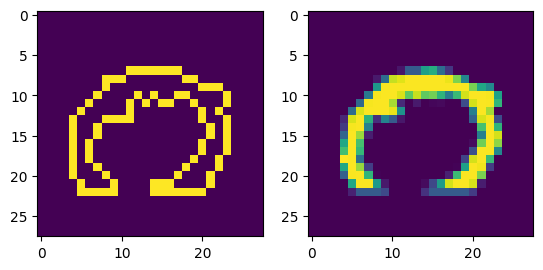

In [13]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

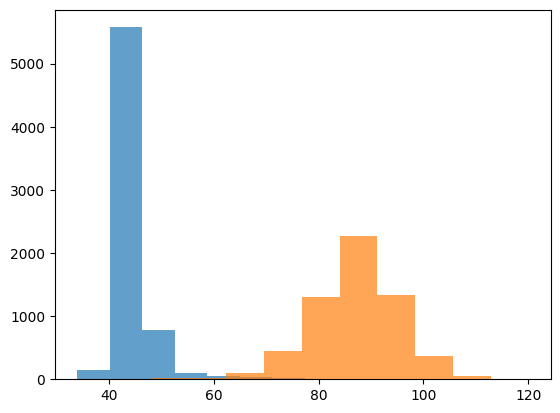

In [14]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

## Features from CSV file

In [15]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [16]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [17]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [18]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})


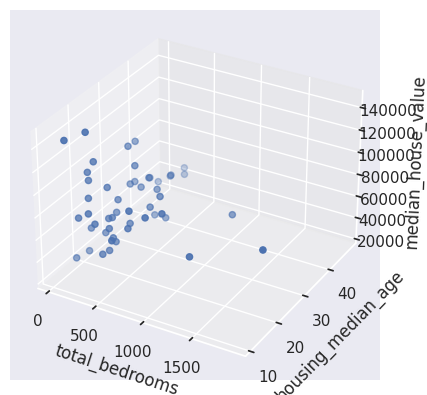

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

In [20]:
## Task :
## Download a CSV file from the internet, upload it to your google drive.
## Read the CSV file and plot graphs using different combination of features and write your analysis
## Ex : IRIS flower datasaet

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# My Answer to the task:

import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IRIS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


When the dataset is examined, it is seen that the leaf length and width information of the iris (Irises) flower is included. Each row shows the measurement values for a flower. The features are sepal-length (lower leaf length cm), sepal-width (lower leaf width cm), petal-length (upper leaf width), petal-width (upper leaf length). As can be seen in the last column, our classes are setosa, versicolor and virginica. 

In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The mean value for sepal length is 5.84 and its standard deviation is 0.83. The mean value for sepal width is 3.05 and its standard deviation is 0.43. The mean value for petal length is 3.76 and its standard deviation is 1.76. The mean value for petal width is 1.19 and its standard deviation is 0.76. The mean and standard deviation give an idea of the variance of a variable. The standard deviation indicates how spread out the data is around the mean. For example, the standard deviation for the petal length variable is 1.76, indicating that the data is quite spread around the mean and has a high variance, while for the sepal width variable the standard deviation is 0.43, an indication that the data is less spread out and has a lower variance. 

Let's display how many attributes and how many observations the data frame consists of.

In [26]:
df.shape

(150, 5)

In [27]:
df.var()

<ipython-input-27-28ded241fd7c>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [28]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

As observed, there are 150 non-blank lines in each line. This means that there is no missing value in our data. We can see this by using the isnull() and sum() functions.

In [29]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Looking at the correlation matrix, the strongest positive relationship is seen between "petal_length" and "petal_width". When the table is examined, it is seen that this ratio is 0.962757. So it's pretty close to 1. This indicates that as the length of the petals of the flowers increases, the width of the petals also increases. There is also a positive relationship between "sepal_length" and "petal_length" with 0.871754, but the relationship between "petal_length" and "petal_width" is stronger (0.96). However, there is almost no relationship between "sepal_length" and "sepal_width" (-0.109). In other words, the relationship between the height and width of the sepal leaf of the plant is quite low.

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-31-48f549963847>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="viridis")


<Axes: >

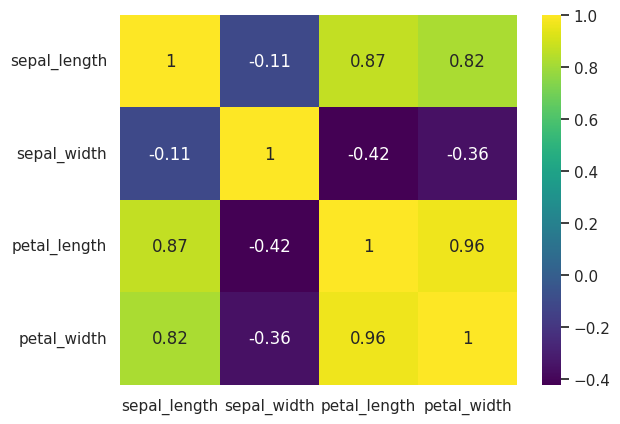

In [31]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")

In [32]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
df["species"].nunique()

3

We see that the sepal.width and sepal.length variables in the data frame are continuous. Let's first use scatterplot to visualize these two continuous data.

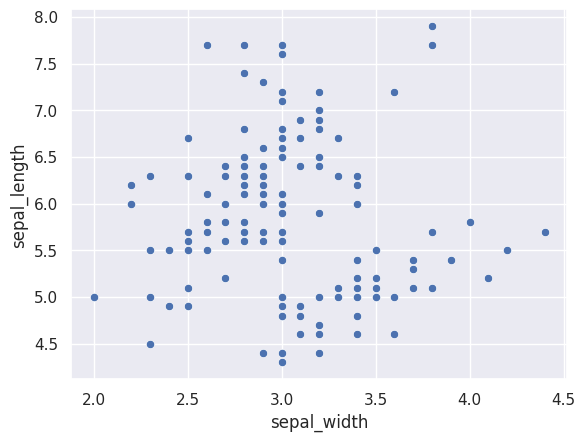

In [34]:
sns.scatterplot(x="sepal_width", y="sepal_length", data=df);

The values of the Sepal Width variable seem to be intense in the range of 2.5-3.5. We can say that the values of the length variable are concentrated between 5.5-7.0.

Let's visualize the same two data using a jointplot to examine their frequencies from a different angle.

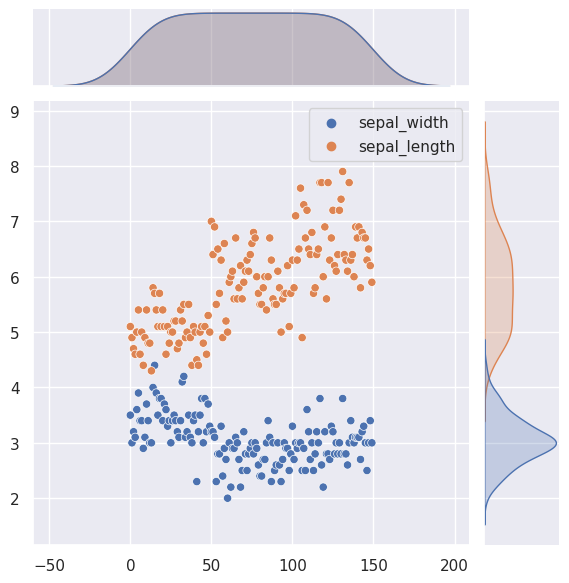

In [35]:
sns.jointplot(data=df[["sepal_width","sepal_length"]]);

Looking at this chart, I see that my previous comment is partially correct. Because in the first chart, I could not see that the values of the length were concentrated between 4.5-5.0. The jointplot chart is a more sensible chart to comment on. Let's visualize the same two data with scatterplot again, but this time let's break it according to the target variable with the "variety" parameter.

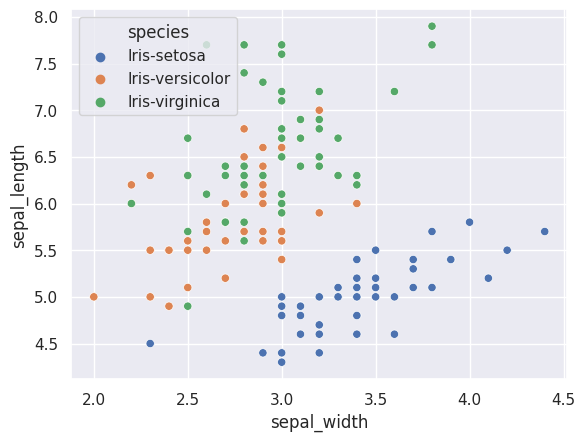

In [36]:
sns.scatterplot(x = "sepal_width", y="sepal_length", hue = "species", data=df );

It is seen in the graph that a clustering can be made between 3 different colors with sepal variables. As can be seen, the dark blue colored "Setosa" species are better separated from the others, but the orange "Versicolor" and the green "Virginica" species are more similar to each other. It is more intertwined. Therefore, it is difficult to precisely distinguish species using sepal features alone. We need to interpret other features by including them in the analysis.

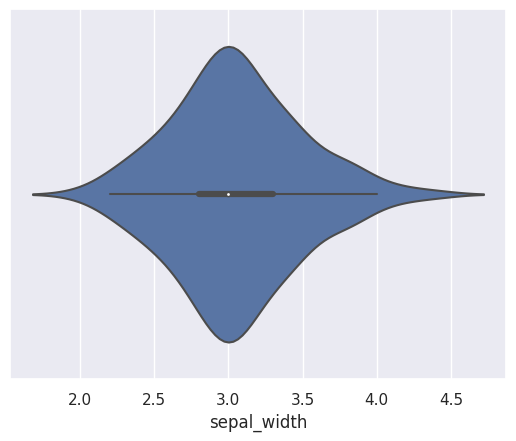

In [37]:
sns.violinplot(x="sepal_width", data = df);

A violin chart is a visualization tool that shows the density curve of the data distribution and also shows whether the data distribution is symmetrical or skewed. By looking at the violin plot of the sepal.width variable, it can be said that the data does not show a normal distribution and there is a slight skewness. The tail on the left side of the graph is longer and protruding. Therefore, we can say that the sepal.width variable does not show a normal distribution. The white dot in the center of the graph indicates the mean of the variable, while the length of the line indicates the distribution of the variable. Here, it is seen that the sepal_width variable is densely distributed between 2.5 and 3.5 and has a wide distribution. Also, a few outliers are seen. Let's plot a distplot on sepal.width for better understanding.

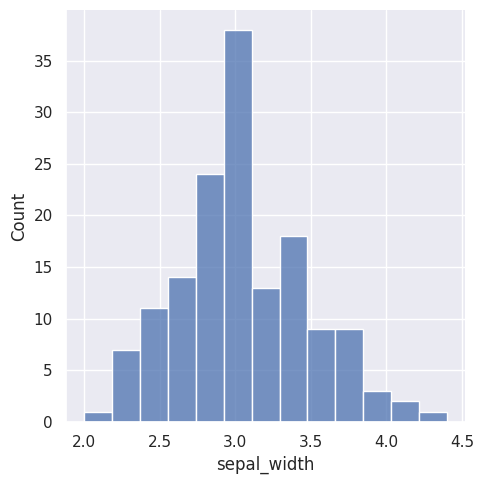

In [38]:
sns.displot(df["sepal_width"]);

The histogram determines the frequency distribution of the data, while the line graph shows the density of the data. In this chart, it can be seen that the data in the sepal_width column shows a distribution close to the normal distribution, but there are also some outliers. Let's visualize three different violin plots for three flower types with a single line on the distribution of the sepal.length variable.

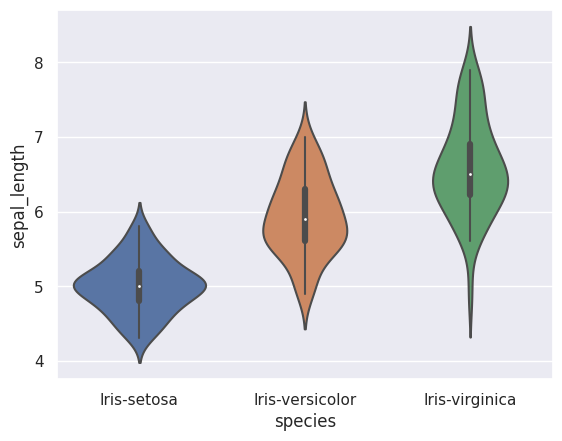

In [39]:
sns.violinplot(x="species" , y="sepal_length", data= df);

The violin chart above shows that the sepal length values of Setosa flowers show a closer distribution, while the sepal length values of Virginica flowers are more widely distributed and therefore more variable. How many observations of which flower type does our data frame contain? We've already seen with value_counts that it's 50 x 3 and balanced, but to express this visually, let's give the sns.countplot() function the variety parameter.

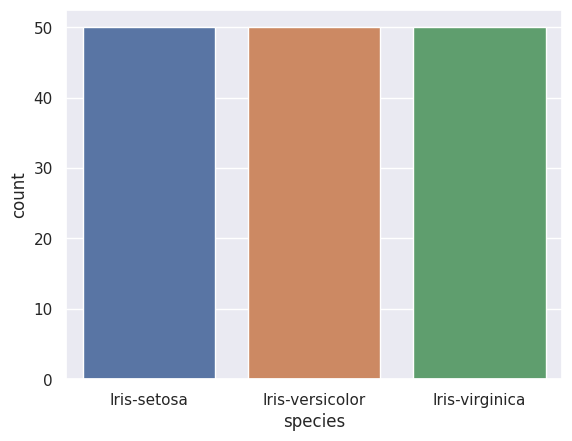

In [40]:
sns.countplot(x = "species",data = df);

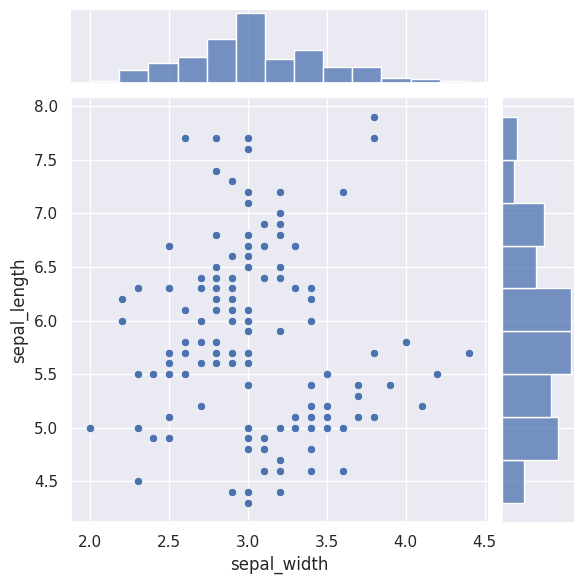

In [41]:
sns.jointplot(x = "sepal_width", y = "sepal_length", data = df);

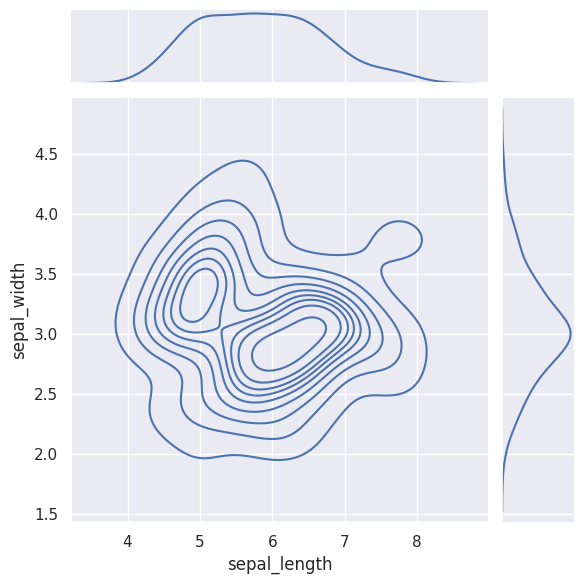

In [42]:
sns.jointplot(x = "sepal_length", y = "sepal_width", data=df, kind= "kde");

I used the kind=kde option to see in which regions the distribution was more common. This option adds a line representing density on the chart. Let's plot the distributions of petal.length and petal.width variables with scatterplot. The following snippet creates a scatterplot with the variable "petal_length" on the x-axis and the variable "petal_width" on the y-axis.

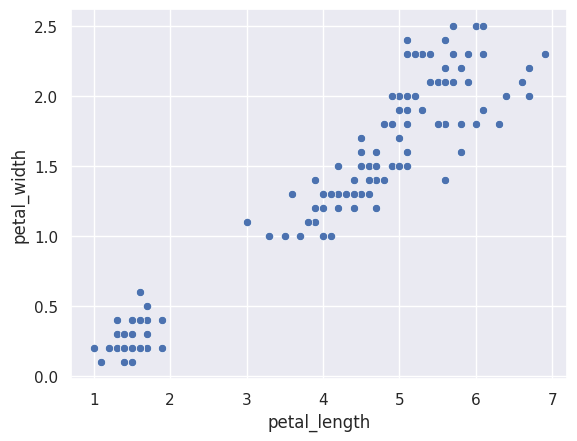

In [43]:
sns.scatterplot(x = "petal_length", y = "petal_width", data = df);

<Axes: xlabel='petal_length', ylabel='petal_width'>

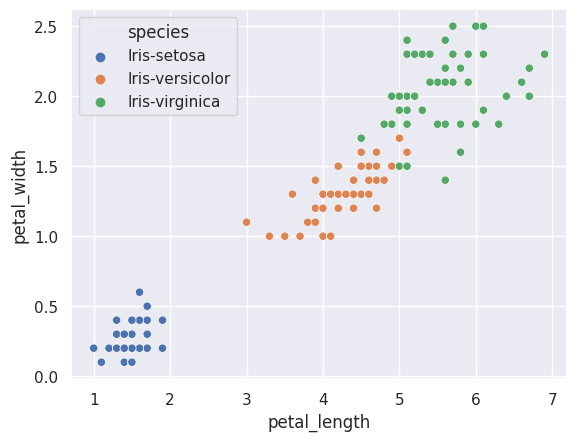

In [44]:
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=df)

According to this chart; We can infer that the setosa species has smaller and narrower leaves than the other two species.

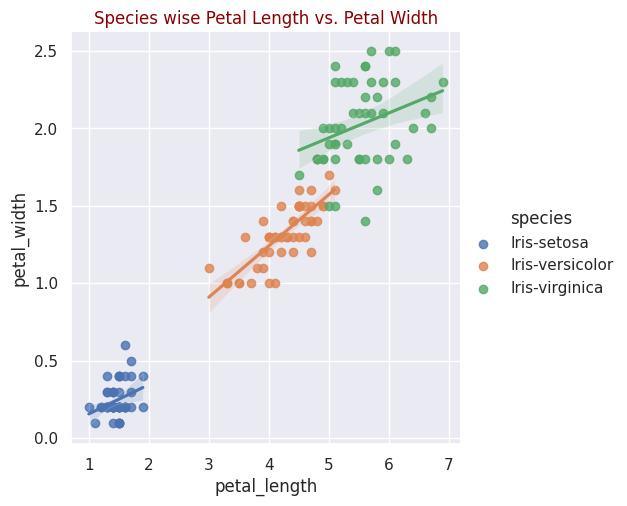

In [45]:
sns.lmplot(x="petal_length", y="petal_width", hue="species", data=df);
plt.title("Species wise Petal Length vs. Petal Width" , color="darkred")
plt.show()

In this visualization, there appears to be a positive relationship between petal length and petal width. That is, as the petal length of a flower increases, the petal width usually increases. Also, for each flower species (setosa, versicolor and virginica), this relationship seems to be on a different line. Especially, the correlation between petal length and petal width values of setosa flowers (dark blue colored spots) seems weaker than the other two flower types. The reason for this may be that setosa flowers have smaller sizes compared to other flower types. Of course, it would be wrong to say that this inference is absolutely true. Along with other cases, it needs to be examined in more detail. The fact that the line in the graph is quite steep indicates that the relationship between these variables is highly correlated. In the graph, the relationship between Versicolor flowers (orange dots) in particular is the most highly correlated.

We can also show the graph in a single way without classifying it by flower types. Looking at this graph, we can see that there is a positive relationship between petal length and width. Data points are grouped close to the line, indicating a high correlation. Showing it as a single type without classification according to the Species variable allows us to see the relationship between all flower types more clearly. To reinforce the answer to this question, let's print the correlation coefficient between the two variables.

In [46]:
petal_corr = df['petal_length'].corr(df['petal_width']);
petal_corr

0.9627570970509663

This result indicates that there is a high positive correlation and that the two variables increase together. Moreover, this result confirms that the relationship between petal length and petal width is strong, as seen in the previous visualization analysis.

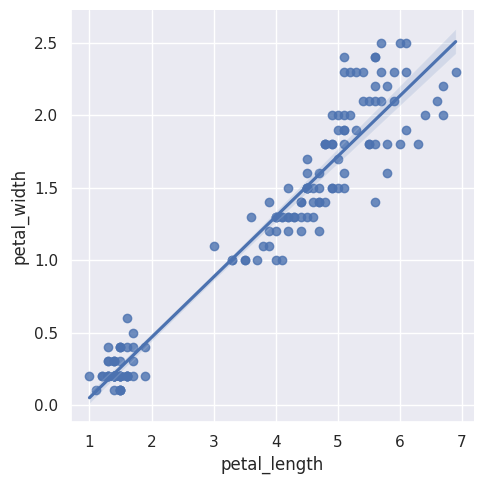

In [47]:
sns.lmplot(x="petal_length", y= "petal_width", data=df)

Looking at this graph, we can see that there is a positive relationship between petal length and width. Data points are grouped close to the line, indicating a high correlation. Showing it as a single type without classification according to the Species variable allows us to see the relationship between all flower types more clearly.

In [48]:
df[["petal_width","petal_length"]].corr()

,petal_width,petal_length
petal_width,1.000000,0.962757
petal_length,0.962757,1.000000


In [49]:
df["Total_Length"] = df["petal_length"] + df["sepal_length"]
df["Total_Length"]

0       6.5
1       6.3
2       6.0
3       6.1
4       6.4
       ... 
145    11.9
146    11.3
147    11.7
148    11.6
149    11.0
Name: Total_Length, Length: 150, dtype: float64

In [50]:
df.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width,Total_Length
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,6.470
Iris-versicolor,5.936,2.770,4.260,1.326,10.196
Iris-virginica,6.588,2.974,5.552,2.026,12.140


Iris setosa is a species with smaller flowers than other species. On the other hand, Iris virginica is the species with the largest flowers. The total length column is a calculated property to accurately express the size of the flowers. The data in this table can help us understand the differences and similarities between species. Let's group by variety, our target variable, and print only the standard deviation values of our petal.length variable. In the code below, we group by species using the groupby() function in the first line and select only the petal_length variable. Then we calculate the standard deviation with std().

In [51]:
(df.groupby(["species"])["petal_length"]).std()

species
Iris-setosa        0.173511
Iris-versicolor    0.469911
Iris-virginica     0.551895
Name: petal_length, dtype: float64

In the Setosa type, the standard deviation of the petal length variable is the lowest, so the difference between the data is very small. In Iris-virginica, the standard deviation of the petal length variable is the highest, ie the difference between the data is greater. This shows that the characteristics of different species are different from each other.

## Augmentation
It is a technique to increase the diversity of our training set by applying random (but realistic) transformations, such as image rotation, change of color etc. When we have limited training data, we can augment our data with help of these techniques.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

For this lab we will use a subset of MNIST that is very small, to better understand the effect of augmentation.

In [53]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

print("original data size:",train_X.shape)


original data size: (60000, 28, 28)


In [54]:
print(train_X[0].shape,train_y[0])

(28, 28) 5


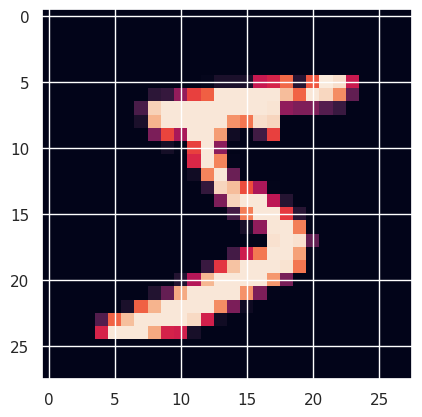

In [55]:
plt.imshow(train_X[0])

In [56]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

print("Now it is:", train_X.shape)

Now it is: (50, 28, 28)


Augmentation 1: rotation
Let us try rotating the image a little. We will use skimage library for this.

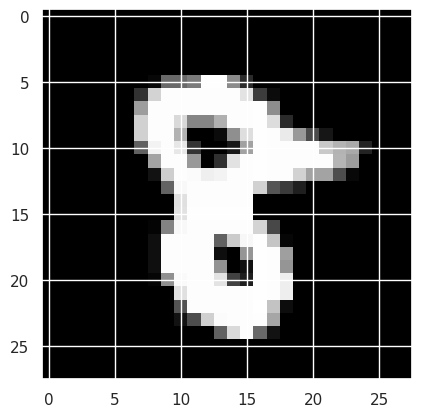

(28, 28)


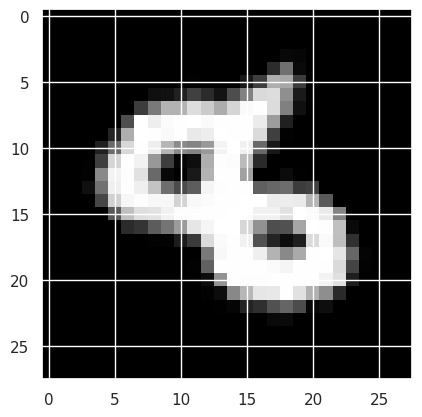

In [57]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
print(train_X[2].shape)
plt.imshow(rotate(train_X[2],45), cmap='gray')

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [58]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple. 

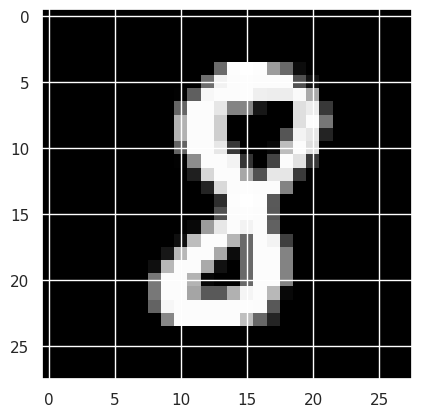

shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.77395605]
angle with constraint is: [19.1769234]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.43887844]
angle with constraint is: [-4.27850922]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.85859792]
angle with constraint is: [25.10185439]


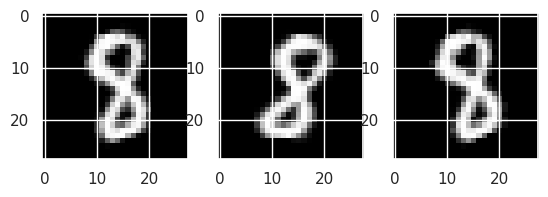

In [59]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us try one more augmentation, Shear: A transformation in which all points along a given line remain fixed while other points are shifted parallel to by a 
 distance proportional to their perpendicular distance from. Shearing a plane figure does not change its area. 

In [60]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

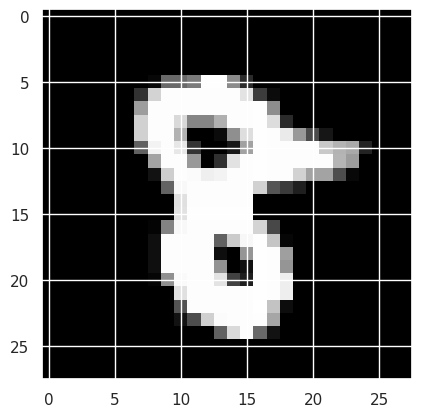

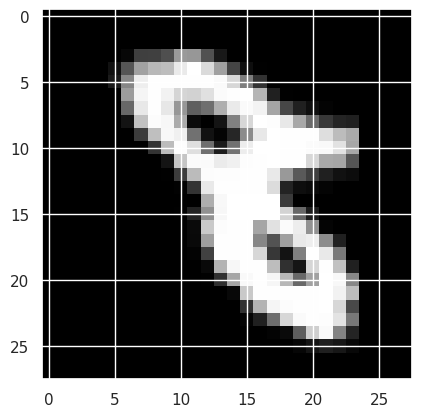

In [61]:
sample = train_X[2]
plt.imshow(sample, cmap='gray')
plt.show()

# apply shear
plt.imshow(shear(sample, 0.4), cmap='gray')

## Let us also see skeletonization of image

In [62]:
from skimage.morphology import skeletonize


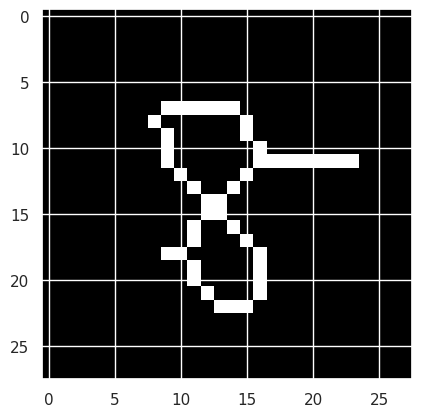

In [63]:
skeleton = skeletonize(train_X[2],method='lee')
plt.imshow(skeleton, cmap='gray')

In [64]:
#Structuring elements that are repeatedly used for thinning

S1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]]) # -1 for dont care
S2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])


def CheckMatch(window,kernel):
  for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if kernel[i,j]!=-1 and window[i,j]!=kernel[i,j]:
                return False
  return True

def ApplyKernel(image,kernel): #used
  height, width =  image.shape
  res = np.copy(image)
  for i in range(1,height-1):
    for j in range (1,width-1):
      window = image[i-1:i+2,j-1:j+2]
      #print('window shape',window.shape)
      Match_result = CheckMatch(window,kernel)
      if (Match_result):
        res[i,j]=0
  return res



def Skeletonization(image):
  '''pass binary image'''
  #new = np.copy(image)
  #old = np.zeros(image.shape,dtype=np.uint8)
  count = 1
  change = 1000
  while (change >0.01):
    print('count',count)
    new = image
    new = ApplyKernel(new,S1)
    new = ApplyKernel(new,S2)
    new = ApplyKernel(new,np.rot90(S1,1)) #90 degree rotate
    new = ApplyKernel(new,np.rot90(S2,1))
    new = ApplyKernel(new,np.rot90(S1,2)) # 180 degree rotate
    new = ApplyKernel(new,np.rot90(S2,2))
    new = ApplyKernel(new,np.rot90(S1,3)) # 270 degree rotate
    new = ApplyKernel(new,np.rot90(S2,3))
    count+= 1
    change = np.mean(np.abs(new-image))
    image = new
    plt.imshow(new,cmap='gray')
    plt.show()
  return new

In [65]:
binarized  =( train_X[0] > 0 ).astype(np.uint8)

count 1


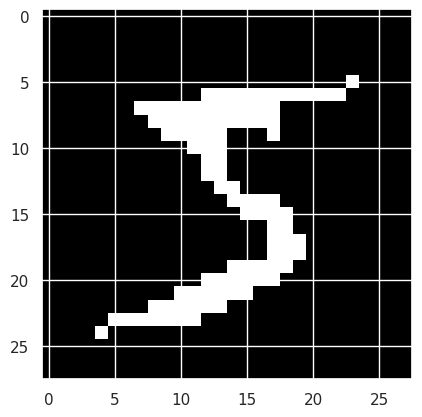

count 2


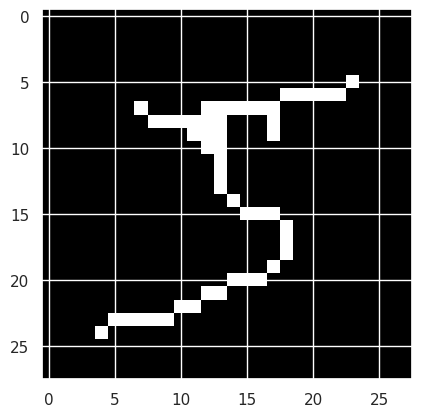

count 3


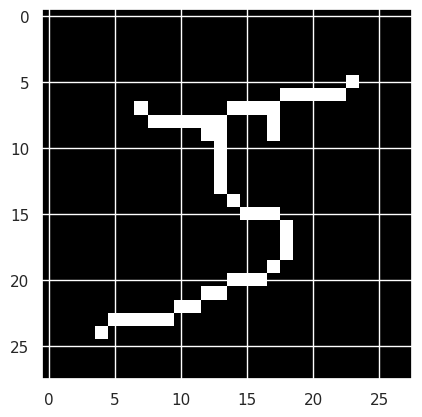

count 4


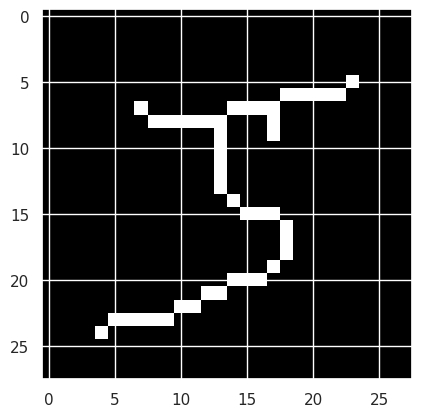

count 5


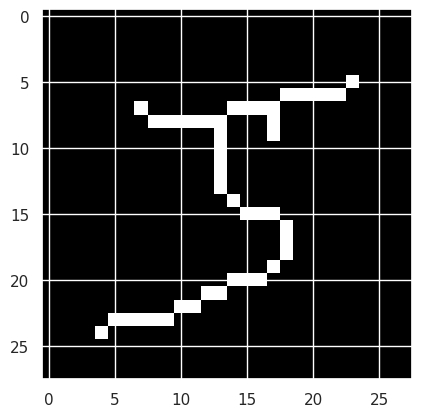

In [66]:
skeleton_five = Skeletonization(binarized)